In [114]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# напишіть функцію гіпотези лінійної регресії у векторному вигляді;
# h(x) = X*w
def h(X, w):
    return np.dot(X, w)

In [116]:
# створіть функцію для обчислення функції втрат у векторному вигляді;
def loss_function(X, y, w):
    n = len(y)
    y_pred = h(X, w)
    mse = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return mse

In [117]:
# реалізуйте один крок градієнтного спуску;
def gradient_descent_step(X, y, w, alpha):
    n = len(y)
    y_pred = h(X, w)
    grad = (1/n) * np.dot(X.T, (y_pred - y))
    w -= alpha * grad
    return w

In [118]:
# знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
# прочитаємо файл
df = pd.read_csv('Housing.csv')
# виведемо перших 5 рядків
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [119]:
# Виберемо дані, які нас цікавлять і виведемо перших 5 рядків
df = df[['price','area','bedrooms','bathrooms']]
df.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [125]:
# визначимо кореляцію
df_corr = df.corr()
df_corr

,price,area,bedrooms,bathrooms
price,1.000000,0.535997,0.366494,0.517545
area,0.535997,1.000000,0.151858,0.193820
bedrooms,0.366494,0.151858,1.000000,0.373930
bathrooms,0.517545,0.193820,0.373930,1.000000


In [120]:
# Перевіримо к-сть даних, чи немає пропусків та тип даних
shape_data = df.shape
data_type = df.dtypes
missing_data = df.isnull().sum() / len(df)
print(f'shape_data : {shape_data}\ndata_type:\n{data_type}\nmissing_data :\n{missing_data}')

shape_data : (545, 4)
data_type:
price        int64
area         int64
bedrooms     int64
bathrooms    int64
dtype: object
missing_data :
price        0.0
area         0.0
bedrooms     0.0
bathrooms    0.0
dtype: float64


In [121]:
# знайдемо найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
X = df[['area', 'bedrooms', 'bathrooms']]
# нормалізуємо Х
X = (X - X.mean()) / X.std()
y  = df['price']
alpha = 0.01
iters = 2500
def train_linear_regression(X, y, alpha, iters):
    X = np.c_[np.ones(X.shape[0]), X]
    w = np.zeros(X.shape[1])
    
    for i in range(iters):
        w = gradient_descent_step(X, y, w, alpha)
    
    return w

w_optimal = train_linear_regression(X, y, alpha, iters)
print("Оптимальні параметри (градієнтний спуск):", w_optimal)

Оптимальні параметри (градієнтний спуск): [4766729.24764805  821968.59292414  300259.18988987  696447.73215659]


In [122]:
# знайдіть ці ж параметри за допомогою аналітичного рішення;
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Додаємо стовпець одиниць
w_normal_equation = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Оптимальні параметри знайдені аналітичним методом:", w_normal_equation)

Оптимальні параметри (нормальне рівняння): [4766729.24770642  821968.58935343  300259.16468032  696447.75898579]


In [123]:
# порівняйте отримані результати.
print("Різниця між методами:", np.abs(w_optimal - w_normal_equation))

Різниця між методами: [5.83734363e-05 3.57071217e-03 2.52095479e-02 2.68291978e-02]


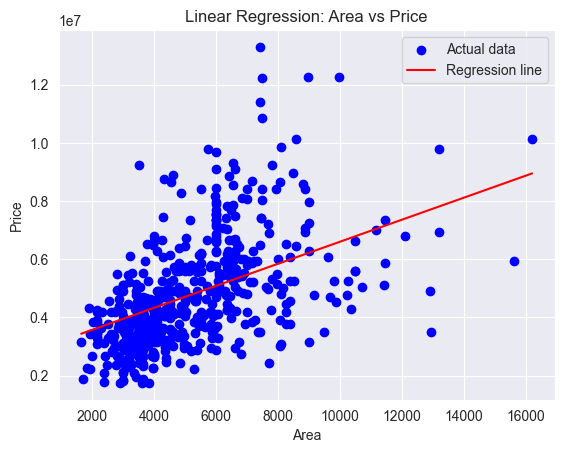

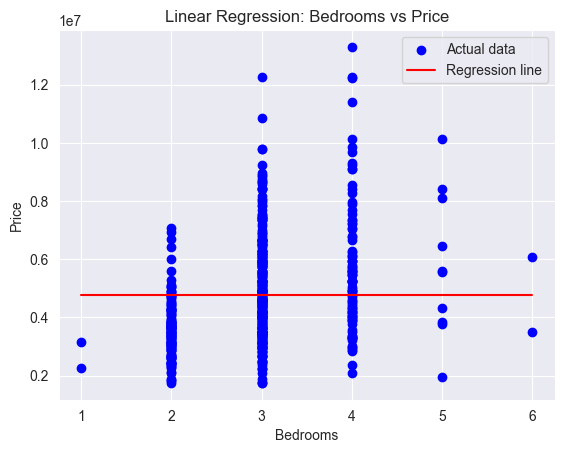

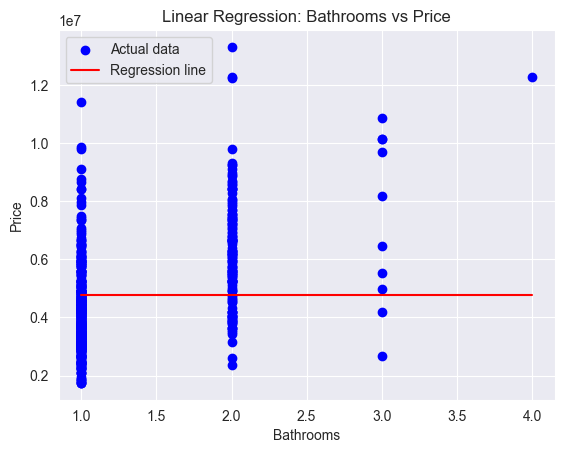

In [124]:
# Графіки регресії для кожної змінної
variables = ['area', 'bedrooms', 'bathrooms']
for i, var in enumerate(variables, start=1):
    plt.figure(i)
    plt.scatter(df[var], y, color='blue', label='Actual data')

    # Визначаємо межі для поточної змінної
    x_range = np.linspace(df[var].min(), df[var].max(), 100)
    X_range = np.c_[np.ones(x_range.shape[0]), 
                    (x_range - df[var].mean()) / df[var].std(),
                    np.zeros((x_range.shape[0], 2))]

    # Нормалізуємо інші змінні
    if var == 'area':
        X_range[:, 2] = (df['bedrooms'].mean() - df['bedrooms'].mean()) / df['bedrooms'].std()
        X_range[:, 3] = (df['bathrooms'].mean() - df['bathrooms'].mean()) / df['bathrooms'].std()
    elif var == 'bedrooms':
        X_range[:, 1] = (df['area'].mean() - df['area'].mean()) / df['area'].std()
        X_range[:, 3] = (df['bathrooms'].mean() - df['bathrooms'].mean()) / df['bathrooms'].std()
    elif var == 'bathrooms':
        X_range[:, 1] = (df['area'].mean() - df['area'].mean()) / df['area'].std()
        X_range[:, 2] = (df['bedrooms'].mean() - df['bedrooms'].mean()) / df['bedrooms'].std()

    predicted_y = hypothesis(X_range, w_optimal)
    plt.plot(x_range, predicted_y, color='red', label='Regression line')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.title(f'Linear Regression: {var.capitalize()} vs Price')
    plt.legend()
    plt.show()